In [1]:
# Importations 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# Color Specific sns 
color = sns.color_palette()[0]

# Bank Campaign


### Table Of Contents
<ul>
<li><a href='intro'>Introduction</a></li>
<li><a href='wrangle'>Data Wrangling</a></li>
<li><a href='eda'>Exploratory Data Analysis </a></li>
<li><a href='ea'>Explanatory Data Analysis </a></li>
<li><a href='conc'>Conclusions</a></li>
</ul>


<a href='intro'></a>

# Introduction

## Our Data
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

## Data's Information


The data Consists of 16 Feature and one Target Variable, the data's attributes in detail:

***Bank client data:***

1. **age** (numeric)

2. **job**: type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","blue-collar","self-employed","retired","technician","services")

3. **marital** : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4. **education** : (categorical: "unknown","secondary","primary","tertiary")

5. **default** : has credit in default? (binary: "yes","no")

6. **balance** (numeric): average yearly balance, in euros 

7. **housing**: has housing loan? (binary: "yes","no")

8. **loan**: has personal loan? (binary: "yes","no")

***Related with the last contact of the current campaign:***

9. **contact**: contact communication type (categorical: "unknown","telephone","cellular")

10. **day**: last contact day of the month (numeric)

11. **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12. **duration**: last contact duration, in seconds (numeric)

***Other attributes:***

13. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15. **previous**: number of contacts performed before this campaign and for this client (numeric)

16. **poutcome**: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

***output variable (desired target):***
17. **y**: has the client subscribed a term deposit? (binary: "yes","no")


## Our Goal 
Simply we need to find what features affect a client subscribtion. as we invistegate the data we will try to unfold it's secrets and try to find the best strategy for a campaign to get more subscribers.

<a id='wrangle'></a>
## Data Wrangling 

In [3]:
# Rename Columns with suitable names
cols = ['age', 'job', 'marital_status', 'education', 'has_credit',
        'balance', 'housing_loan', 'personal_loan', 
       'contact_type', 'lastc_day', 'lastc_month', 'lastc_duration', 
       'contact_count', 'passed_days', 'past_contacts', 'past_out', 
       'subscribed']

In [4]:
# Load the data 
df = pd.read_csv('campaign.csv', names=cols, header=0)
df.head(5)

,age,job,marital_status,education,has_credit,balance,housing_loan,personal_loan,contact_type,lastc_day,lastc_month,lastc_duration,contact_count,passed_days,past_contacts,past_out,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [5]:
# Data columns types and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital_status  45211 non-null  object
 3   education       45211 non-null  object
 4   has_credit      45211 non-null  object
 5   balance         45211 non-null  int64 
 6   housing_loan    45211 non-null  object
 7   personal_loan   45211 non-null  object
 8   contact_type    45211 non-null  object
 9   lastc_day       45211 non-null  int64 
 10  lastc_month     45211 non-null  object
 11  lastc_duration  45211 non-null  int64 
 12  contact_count   45211 non-null  int64 
 13  passed_days     45211 non-null  int64 
 14  past_contacts   45211 non-null  int64 
 15  past_out        45211 non-null  object
 16  subscribed      45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [6]:
# Statistics
df.describe()

,age,balance,lastc_day,lastc_duration,contact_count,passed_days,past_contacts,subscribed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,1.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


#### Comments :
From the first look into the data there seems to be no missing valuesbut further searching led to the following insights:

- `lastc_duration` has a minimum value of zero .
- `balance` has a negative minimum value.
- `contact_count` has a maximum value of 63 which might be an outlier.
- `past_contacts` 275 as a maximum value again a possible outlier.
- `subscribed` 2 is not a convenient value for a binary variable.


We will invetigate furthrer to make sure our data is clean before we make any visualization or conclusions.

## Data Cleaning

#### Negative Values in `balance`

In [7]:
# Get balance with negative values
print(f'Number of Clients with balance under zero : {df[df.balance < 0].shape[0]}')

Number of Clients with balance under zero : 3766


3766 clients are recorded to make a negative value per year, This is just not possible. I will try to replace these values with the mean. However the mean is not that accurate so to compensate i will try to find the mean for specific group of client features. 

I choose to plot incomes with over 500 to see the relationship with other client's features

In [8]:
# Get CLients with balance above 500 euros
df_balance = df[df.balance > 500]

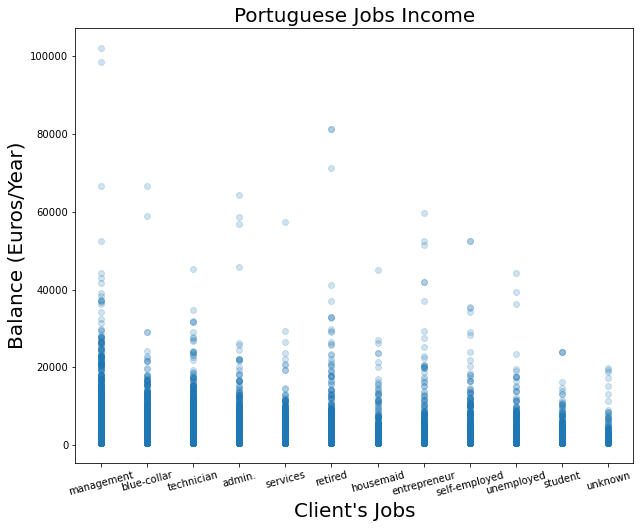

In [9]:
# Job Vs Balance
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(df_balance.job, df_balance.balance, alpha=0.2)
plt.xticks(rotation=15)
plt.ylabel('Balance (Euros/Year)', fontsize=20)
plt.xlabel("Client's Jobs", fontsize=20)
plt.title("Portuguese Jobs Income", fontsize=20)

plt.show()

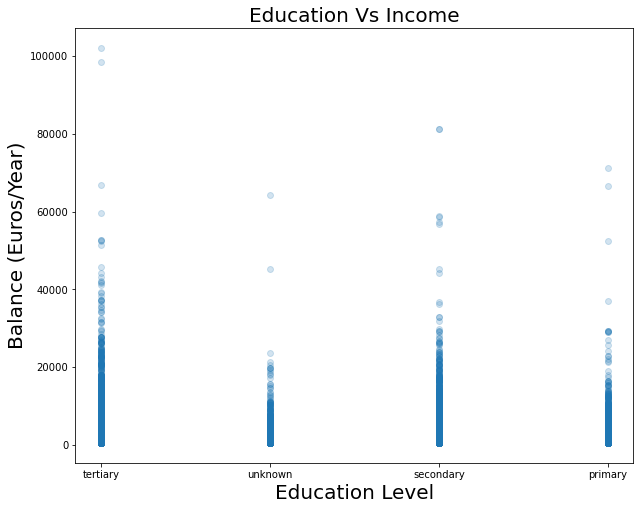

In [10]:
# Figure axis
fig, ax = plt.subplots(figsize=(10, 8))

# Age Vs Balance
ax.scatter(df_balance.education, df_balance.balance, alpha=0.2)

plt.title("Education Vs Income", fontsize=20)
plt.xlabel('Education Level', fontsize=20)
plt.ylabel('Balance (Euros/Year)', fontsize=20)

plt.show()

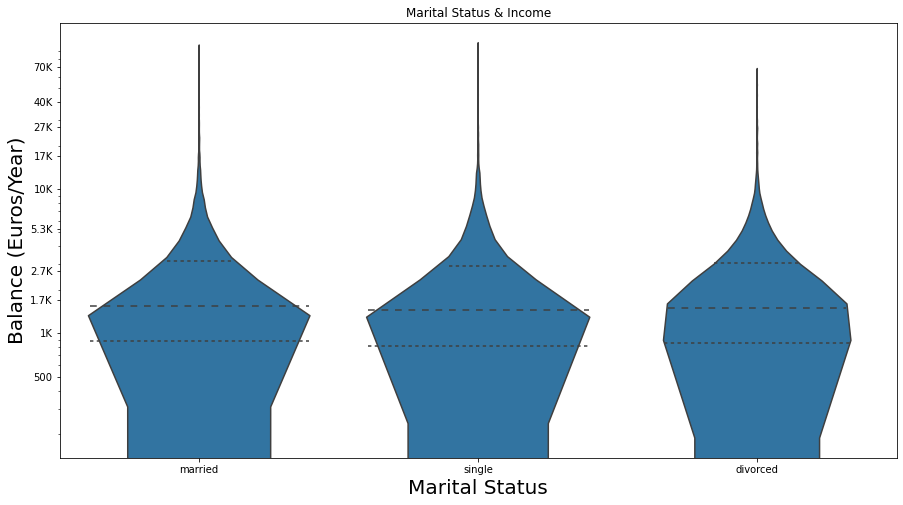

In [11]:
# Figure axis
fig, ax = plt.subplots(figsize=(15, 8))
yticks = [500, 1e3, 1.7e3, 2.7e3, 5.3e3, 10e3, 17e3, 27e3, 40e3, 70e3]
ylabels = ['500', '1K', '1.7K', '2.7K', '5.3K', '10K', '17K', '27K', '40K', '70K']

# Plot Marital Status vs Balance
sns.violinplot(df_balance.marital_status, df_balance.balance, alpha=0.2, color=color, inner='quartile')
plt.yscale('log')
plt.yticks(yticks, ylabels)
plt.xlabel('Marital Status', fontsize=20)
plt.ylabel('Balance (Euros/Year)', fontsize=20)
plt.title("Marital Status & Income")


plt.show()

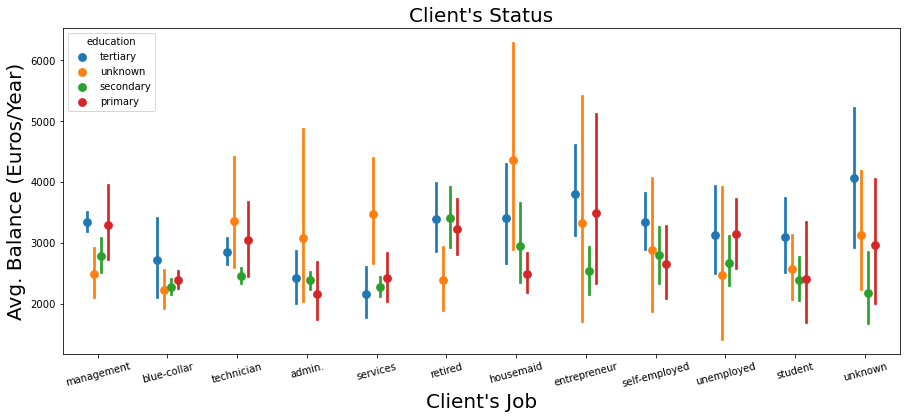

In [13]:
# Figure axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot Job, Marital Status and Balance all together 
sns.pointplot(df_balance.job, df_balance.balance,
              hue=df_balance.education , linestyles='', dodge=0.3)

# Plot Customization
plt.xticks(rotation=15)
plt.title("Client's Status", fontsize=20)
plt.xlabel("Client's Job", fontsize=20)
plt.ylabel('Avg. Balance (Euros/Year)', fontsize=20)

plt.show()

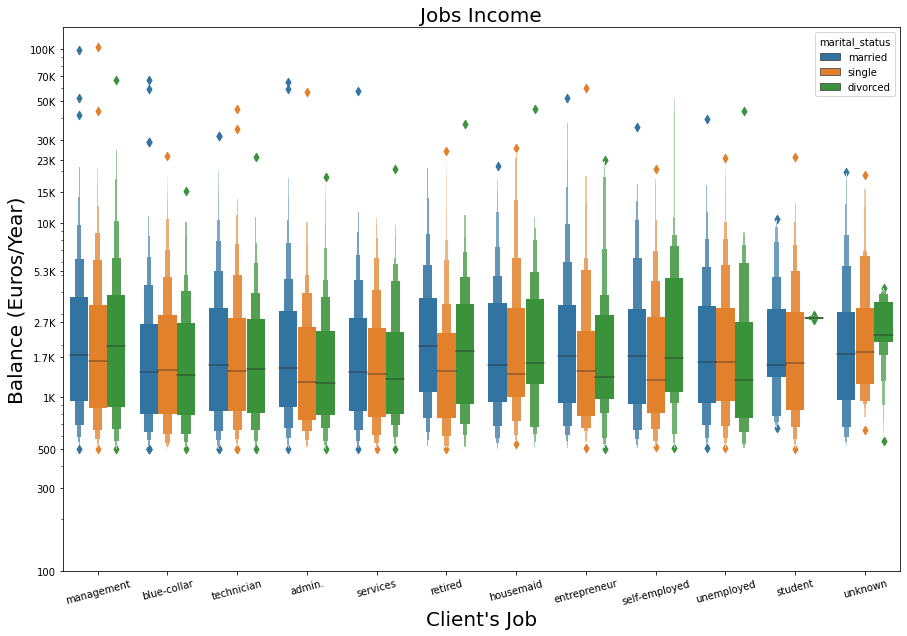

In [14]:
# Figure axis
fig, ax = plt.subplots(figsize=(15, 10))

sns.boxenplot(df_balance.job, df_balance.balance, hue=df_balance.marital_status)

# Plot Customizations 
plt.xticks(rotation=15)
plt.xlabel("Client's Job", fontsize=20)
plt.ylabel('Balance (Euros/Year)', fontsize=20)
plt.title('Jobs Income', fontsize=20)
yticks = [100, 300, 500, 1e3, 1.7e3, 2.7e3, 5.3e3, 10e3, 15e3, 23e3, 30e3, 50e3, 70e3, 10e4]
ylabels = ['100', '300', '500', '1K', '1.7K', '2.7K', '5.3K', '10K', '15K', '23K', '30K', '50K', '70K', '100K']
plt.yscale('log')
plt.yticks(yticks, ylabels)

# Show Plot
plt.show()

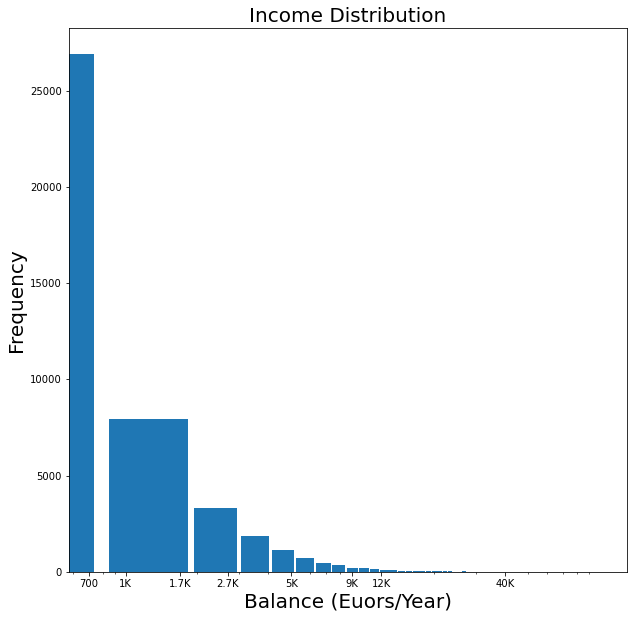

In [15]:
# Figure Axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Balance Distribution
ax.hist(df.balance, bins=100, rwidth=0.9)

# Plot Customizations
plt.xscale('log')
xticks = [700, 1e3, 1.7e3, 2.7e3, 5e3, 9e3, 12e3, 40e3] 
xlabels = ['700', '1K', '1.7K', '2.7K', '5K', '9K', '12K', '40K']
plt.xticks(xticks, xlabels)
plt.xlabel('Balance (Euors/Year)', fontsize=20)
plt.title('Income Distribution', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

# Show Plot
plt.show()

It seems a bit off that some incomes are only 1 Euro per Year or even negtaive. This may be a case of a Missing not at Random values since this is a salary and highly paied clients might not want to reveal their salary. Clients may leave a misleadnig value in order not to reveal their salary.

I only replaced Negative values with mean of a specified group of features for the client.

In [16]:
# Transform all values less than 0 to NaN
df.loc[df.balance < 0, 'balance'] = np.nan

# Group Client's income 
df['balance'] = df.groupby(['job', 'marital_status', 'education']).transform(
    lambda grp: grp.fillna(grp.mean())).balance

In [17]:
# Check
(df[df.balance < 0].shape[0] == 0)

True

#### Binarize Subscribe Variable 

In [18]:
df.subscribed.value_counts()

1    39922
2     5289
Name: subscribed, dtype: int64

This is an imbalanced dataset with subscribers only 5289 so i will change the values to 0 and 1 for convenience 

In [19]:
# Change 1 to 0 
df.loc[:, 'subscribed'] -= 1
df.subscribed.value_counts()

0    39922
1     5289
Name: subscribed, dtype: int64

#### `lastc_duration` investigation

In [20]:
# Convert Duration to minutes for convinence 
df.loc[:, 'lastc_duration'] /= 60

In [21]:
df[df.lastc_duration == 0]

,age,job,marital_status,education,has_credit,balance,housing_loan,personal_loan,contact_type,lastc_day,lastc_month,lastc_duration,contact_count,passed_days,past_contacts,past_out,subscribed
6424,53,management,married,primary,no,351.0,yes,no,unknown,27,may,0.0,4,-1,0,unknown,0
22937,35,technician,married,secondary,no,5535.0,no,no,cellular,26,aug,0.0,15,-1,0,unknown,0
36425,31,entrepreneur,married,secondary,no,162.0,yes,yes,cellular,11,may,0.0,2,-1,0,unknown,0


So it seems like some clients were contacted but never responded and consequently they did not subscirbe 

#### `past_contacts` investigation

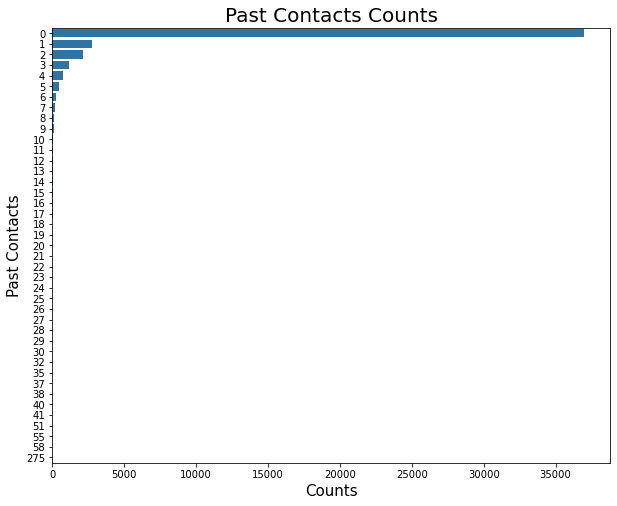

In [22]:
# Get Past contacts larger than 0
fig, ax= plt.subplots(figsize=(10, 8))

# Past Contacts count
sns.countplot(y= df.past_contacts, color=color, ax=ax)

# plot customizations 
plt.title('Past Contacts Counts', fontsize=20)
plt.xlabel("Counts", fontsize=15)
plt.ylabel('Past Contacts', fontsize=15)

plt.show()

In [23]:
df[df.past_contacts > 200].past_contacts

29182    275
Name: past_contacts, dtype: int64

In [24]:
df[df.past_contacts > 20].shape[0]

55

So it seems like one value with 275 is a highly possible outlier, However some past contacts reachs 40 about 55 row with such values it seems off to call a client with such number but i will remove only the 275 until further investigation.

In [26]:
df.drop(df[df.past_contacts > 200].index, axis=0, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis 

Now we are at the point in our investigation were we are interested in finding relationships between our features and the Target variable.

#### Related to the client

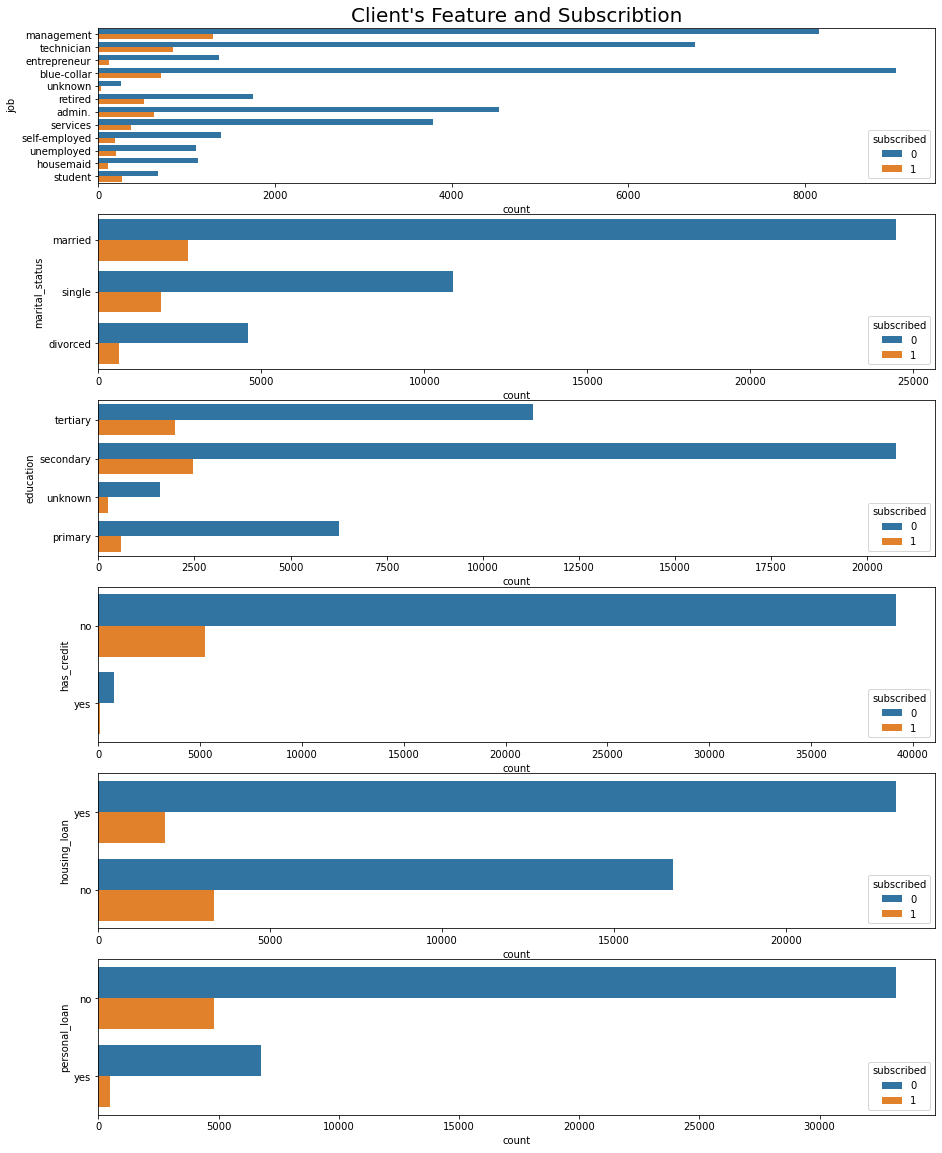

In [69]:
fig, ax = plt.subplots(6, 1, figsize=(15, 20))

sns.countplot(y=df.job, hue=df.subscribed, ax=ax[0])
sns.countplot(y=df.marital_status, hue=df.subscribed, ax=ax[1])
sns.countplot(y=df.education, hue=df.subscribed, ax=ax[2])
sns.countplot(y=df.has_credit, hue=df.subscribed, ax=ax[3])
sns.countplot(y=df.housing_loan, hue=df.subscribed, ax=ax[4])
sns.countplot(y=df.personal_loan, hue=df.subscribed, ax=ax[5])

ax[0].set_title("Client's Feature and Subscribtion", fontsize=20)
plt.show()

The figures may be misleading since the number of subscribers is much less than the number of non subscribers.

(array([ 320., 1462., 1295.,  726.,  648.,  497.,  148.,  138.,   48.,
           7.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

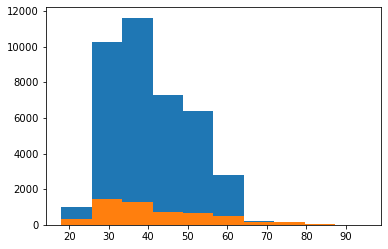

In [70]:
plt.hist(df[df.subscribed == 0].age)
plt.hist(df[df.subscribed == 1].age)